# MLR

In [2]:
SST <- read.table("SST.txt", header=T,skipNul = T)

In [3]:
head(SST)

Year Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct   
1 1851     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
2 1852     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
3 1853     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
4 1854     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
5 1855     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
6 1856 19.136 18.625 18.675 19.016 19.936 21.177 22.419 23.123 23.081 22.141
  Nov    Dec  
1     NA    NA
2     NA    NA
3     NA    NA
4     NA    NA
5     NA    NA
6 21.056 20.05

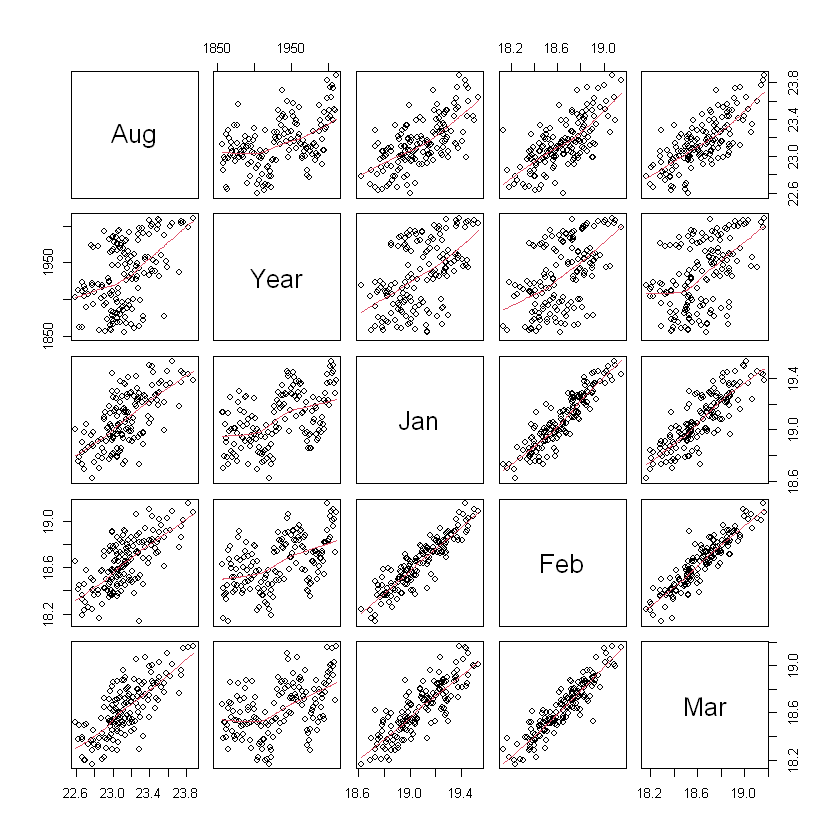

In [6]:
pairs(SST[, c(9, 1:4)], panel=panel.smooth)
# Aug vs Year-Jan-Feb-Mar

In [8]:
mlr <- lm(Aug ~ Year + Jan + Feb + Mar, data=SST)

In [9]:
summary(mlr)


Call:
lm(formula = Aug ~ Year + Jan + Feb + Mar, data = SST)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41885 -0.11282 -0.01247  0.12680  0.47444 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.1748644  1.3154358   4.694 5.99e-06 ***
Year         0.0007032  0.0003706   1.897   0.0597 .  
Jan          0.1856062  0.1666996   1.113   0.2673    
Feb         -0.1174477  0.2187479  -0.537   0.5921    
Mar          0.7649206  0.1610577   4.749 4.73e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1753 on 150 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.5646,	Adjusted R-squared:  0.553 
F-statistic: 48.64 on 4 and 150 DF,  p-value: < 2.2e-16


remove Feb

In [11]:
mlr2 <- lm(Aug ~ Year + Jan + Mar, data=SST)
summary(mlr2)


Call:
lm(formula = Aug ~ Year + Jan + Mar, data = SST)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43185 -0.11363 -0.00029  0.12142  0.47812 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.2031817  1.3112768   4.731  5.1e-06 ***
Year        0.0006811  0.0003675   1.853   0.0658 .  
Jan         0.1287903  0.1285013   1.002   0.3178    
Mar         0.7063698  0.1182418   5.974  1.6e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1749 on 151 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.5638,	Adjusted R-squared:  0.5551 
F-statistic: 65.06 on 3 and 151 DF,  p-value: < 2.2e-16


In [12]:
# koef jan not significant, remove

In [14]:
mlr3 <- lm(Aug ~ Mar + Year, data = SST)
summary(mlr3)


Call:
lm(formula = Aug ~ Mar + Year, data = SST)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42889 -0.11031 -0.00452  0.11621  0.47396 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.7690202  1.1835330   5.719  5.5e-08 ***
Mar         0.7998659  0.0726563  11.009  < 2e-16 ***
Year        0.0007584  0.0003593   2.111   0.0364 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1749 on 152 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.5609,	Adjusted R-squared:  0.5551 
F-statistic: 97.08 on 2 and 152 DF,  p-value: < 2.2e-16


# Predictor of Choice

* $H$: variable of interest
* $X_{1},\cdots ,X_{p}$: potential explanatory variables

Akike Information Criterion (AIC)
$$AIC = 2(p+1)+n \log{\left(\frac{SSE}{n}\right)}$$

* $p$ : the number of predictors
* $SSE$: residual sum of squares

In [15]:
drop1(mlr)

Df Sum of Sq   RSS      AIC      
<none> NA          NA 4.609754 -534.8639
Year    1 0.110621421 4.720375 -533.1882
Jan     1 0.038098029 4.647852 -535.5881
Feb     1 0.008859065 4.618613 -536.5663
Mar     1 0.693195890 5.302950 -515.1501

Stepwise regression:

In [17]:
step(mlr) # automatic MLR

Start:  AIC=-534.86
Aug ~ Year + Jan + Feb + Mar

       Df Sum of Sq    RSS     AIC
- Feb   1   0.00886 4.6186 -536.57
- Jan   1   0.03810 4.6479 -535.59
<none>              4.6098 -534.86
- Year  1   0.11062 4.7204 -533.19
- Mar   1   0.69320 5.3029 -515.15

Step:  AIC=-536.57
Aug ~ Year + Jan + Mar

       Df Sum of Sq    RSS     AIC
- Jan   1   0.03072 4.6493 -537.54
<none>              4.6186 -536.57
- Year  1   0.10508 4.7237 -535.08
- Mar   1   1.09158 5.7102 -505.68

Step:  AIC=-537.54
Aug ~ Year + Mar

       Df Sum of Sq    RSS     AIC
<none>              4.6493 -537.54
- Year  1    0.1363 4.7856 -535.06
- Mar   1    3.7071 8.3565 -448.66



Call:
lm(formula = Aug ~ Year + Mar, data = SST)

Coefficients:
(Intercept)         Year          Mar  
  6.7690202    0.0007584    0.7998659  
